In [66]:
# quick sanity check to see how close two points on the sphere should be 
import torch 
import matplotlib.pyplot as plt

In [31]:
def make_dataset(n, d):
    # Returns a dataset of n d-dimensional uniform spherical points and n random signs 
    x = torch.randn(n, d)
    x = x / x.norm(dim=1, keepdim=True)
    y = torch.bernoulli(torch.empty(n).uniform_(0, 1)).long()

    return x, y

In [60]:
def min_dist(x, y):
    pos_x = x.index_select(0, y.nonzero().squeeze())
    neg_x = x.index_select(0, (1-y).nonzero().squeeze())
    running_min = float('inf')
    
    for p in pos_x:
        for n in neg_x:
            c = (p - n).norm().item() 
            if c < running_min:
                running_min = c 
    return running_min

In [69]:
def sample_min(n, d, samples):
    running_mins = [] 
    for _ in range(samples):
        running_mins.append(min_dist(*make_dataset(n, d)))
    return running_mins

In [70]:
sample_min(1000, 10, 100)

[0.26041799783706665,
 0.3202751874923706,
 0.35123613476753235,
 0.3088516592979431,
 0.3704918920993805,
 0.3351423740386963,
 0.31980523467063904,
 0.3136959969997406,
 0.2731875479221344,
 0.3246955871582031,
 0.3605259656906128,
 0.2736228108406067,
 0.35387641191482544,
 0.3524811863899231,
 0.27547696232795715,
 0.21515634655952454,
 0.30450373888015747,
 0.2904394567012787,
 0.3042549192905426,
 0.3251737952232361,
 0.2927997410297394,
 0.2391289919614792,
 0.24604672193527222,
 0.28461676836013794,
 0.2806522846221924,
 0.36692988872528076,
 0.3425011932849884,
 0.30088332295417786,
 0.22867915034294128,
 0.3219164311885834,
 0.23469965159893036,
 0.2966797947883606,
 0.30593425035476685,
 0.3094387650489807,
 0.2501084506511688,
 0.25526657700538635,
 0.24823960661888123,
 0.3480050563812256,
 0.35760125517845154,
 0.26262781023979187,
 0.2566191852092743,
 0.30608463287353516,
 0.2942313551902771,
 0.2877516746520996,
 0.2307676523923874,
 0.26743999123573303,
 0.26955401897

In [71]:
rms = [0.26041799783706665,
 0.3202751874923706,
 0.35123613476753235,
 0.3088516592979431,
 0.3704918920993805,
 0.3351423740386963,
 0.31980523467063904,
 0.3136959969997406,
 0.2731875479221344,
 0.3246955871582031,
 0.3605259656906128,
 0.2736228108406067,
 0.35387641191482544,
 0.3524811863899231,
 0.27547696232795715,
 0.21515634655952454,
 0.30450373888015747,
 0.2904394567012787,
 0.3042549192905426,
 0.3251737952232361,
 0.2927997410297394,
 0.2391289919614792,
 0.24604672193527222,
 0.28461676836013794,
 0.2806522846221924,
 0.36692988872528076,
 0.3425011932849884,
 0.30088332295417786,
 0.22867915034294128,
 0.3219164311885834,
 0.23469965159893036,
 0.2966797947883606,
 0.30593425035476685,
 0.3094387650489807,
 0.2501084506511688,
 0.25526657700538635,
 0.24823960661888123,
 0.3480050563812256,
 0.35760125517845154,
 0.26262781023979187,
 0.2566191852092743,
 0.30608463287353516,
 0.2942313551902771,
 0.2877516746520996,
 0.2307676523923874,
 0.26743999123573303,
 0.2695540189743042,
 0.249784454703331,
 0.28215551376342773,
 0.35546809434890747,
 0.3230990171432495,
 0.3094885051250458,
 0.26256847381591797,
 0.3017466366291046,
 0.33639127016067505,
 0.3358645439147949,
 0.33531397581100464,
 0.30719685554504395,
 0.31382012367248535,
 0.3046570420265198,
 0.2940406799316406,
 0.30682167410850525,
 0.29261863231658936,
 0.26610100269317627,
 0.21824920177459717,
 0.29590123891830444,
 0.26324981451034546,
 0.27430689334869385,
 0.2923928201198578,
 0.32558974623680115,
 0.3422098755836487,
 0.3362289369106293,
 0.28233951330184937,
 0.30634403228759766,
 0.2721748650074005,
 0.28113502264022827,
 0.3209698796272278,
 0.2728094756603241,
 0.30827760696411133,
 0.2937726378440857,
 0.279094398021698,
 0.3552402853965759,
 0.24029429256916046,
 0.30005574226379395,
 0.34282732009887695,
 0.3133623003959656,
 0.22485587000846863,
 0.3460048735141754,
 0.3067816495895386,
 0.36047327518463135,
 0.2821442186832428,
 0.31185266375541687,
 0.32618823647499084,
 0.29874613881111145,
 0.28867000341415405,
 0.31149768829345703,
 0.35461217164993286,
 0.32385218143463135,
 0.3540703356266022,
 0.3322259485721588]


(array([ 2.,  2.,  2.,  3.,  3.,  3.,  5.,  7.,  7.,  6.,  7., 12.,  8.,
         6.,  4.,  6.,  4.,  6.,  5.,  2.]),
 array([0.21515635, 0.22292312, 0.2306899 , 0.23845668, 0.24622346,
        0.25399023, 0.26175701, 0.26952379, 0.27729056, 0.28505734,
        0.29282412, 0.3005909 , 0.30835767, 0.31612445, 0.32389123,
        0.33165801, 0.33942478, 0.34719156, 0.35495834, 0.36272511,
        0.37049189]),
 <a list of 20 Patch objects>)

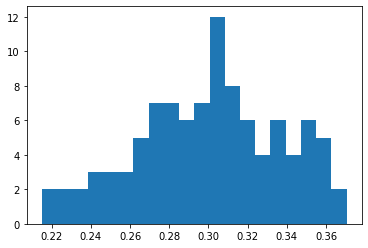

In [73]:
plt.hist(rms, bins=20)